# Transfer Learning & Fine Tuning 

## What you'll learn in this class ##

A valuable faculty of Deep Learning is that of being able to adapt to many different situations through _Transfer Learning_. The principle is simple, instead of building a neural network architecture from scratch, we will use pre-made and pre-trained architectures. This technique allows us to achieve _state of the art_ performance results. 

This course therefore aims to show how to perform _Transfer Learning_ on Tensorflow 2.0. We will use this for image recognition on flower types contained in a *flower_photos* folder.

## Loading dataset & preprocessing. 

### Downloading images from paths

In [ ]:
import tensorflow as tf

We will use the *get_file* method of the *tf.keras.utils* module to download public data contained in Google Cloud Storage that we will then store in a *flower_photos* folder.

In [ ]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='/content/flower_photos.tgz', 
                                         extract=True,
                                         cache_subdir="/content")
data_root = pathlib.Path("/content/flower_photos")
print(data_root)

228818944/228813984 [==============================] - 8s 0us/step
/content/flower_photos


In the code above, we specify the following parameters: 

* `origin`: the url to which the data is contained 
* `fname`: is the name of the file you wish to download. You can also specify the path where the file should be stored.
* `untar`: This allows you to unpack files automatically. 
* `cache_subdir`: This specifies the subfolder where the decompressed data should be stored. 

Now let's take a look at each of the files in the folder. 

In [ ]:
for item in data_root.iterdir():
    print(item)

/content/flower_photos/daisy
/content/flower_photos/tulips
/content/flower_photos/sunflowers
/content/flower_photos/roses
/content/flower_photos/LICENSE.txt
/content/flower_photos/dandelion


Now let's look at some pictures. For this we will use the `tf.image` module which will allow us to look at each of the images and do some preprocessing. 

In [ ]:
all_image_paths = [str(path) for path in data_root.glob("*/*")]

In [ ]:
len(all_image_paths)

3670

In [ ]:
all_image_paths[:10]

['/content/flower_photos/daisy/5883162120_dc7274af76_n.jpg',
 '/content/flower_photos/daisy/2539552964_921cf645ba_n.jpg',
 '/content/flower_photos/daisy/4538877108_3c793f7987_m.jpg',
 '/content/flower_photos/daisy/9242705328_eee8402a8d.jpg',
 '/content/flower_photos/daisy/3637428148_a1dcccafa9_n.jpg',
 '/content/flower_photos/daisy/498159452_b71afd65ba.jpg',
 '/content/flower_photos/daisy/2862944799_45bc8e7302.jpg',
 '/content/flower_photos/daisy/4544110929_a7de65d65f_n.jpg',
 '/content/flower_photos/daisy/11439894966_dca877f0cd.jpg',
 '/content/flower_photos/daisy/7133935763_82b17c8e1b_n.jpg']

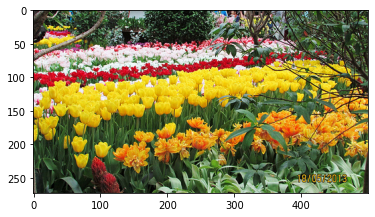

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

random_image = all_image_paths[np.random.randint(len(all_image_paths))]
random_image = tf.io.read_file(random_image)
random_image = tf.image.decode_jpeg(random_image).numpy()
plt.imshow(random_image)

### .map method

We will use a model of Deep Learning called InceptionV3 that takes a specific image size. It will be good to standardize the size of each of our tensors.

We will then have to fit this into an `tf.data.Dataset` in order to put it in a model. To do this we will have to do it in several steps: 

1. We will create a function that will preprocess the images and put them at the right size: `(192, 192)`.
2. We will create an instance of `tf.data.Dataset`.
3. We will do a mapping of the preprocessing we need to perform on the images. 

In [ ]:
# Create a function reading path to picture
# Decode picture then change the size
def preprocess_and_load_images(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    return image

In [ ]:
# Create an instance of tf.data
ds_paths = tf.data.Dataset.from_tensor_slices(all_image_paths)
ds_images = ds_paths.map(preprocess_and_load_images)

This `.map` method may not be practical at first glance. It works the same way as `lambda`. The goal is to apply to each of the images the function we defined above, which we put as an argument to `.map`. 

This method is extremely practical and is used a lot in the Tensorflow universe. Read more about it here: 

[map function](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)

In [ ]:
# Take a look with some examples of our dataset to see if everything is fine
for i, example in enumerate(ds_images):
    print(example)
    if i == 3:
        break

tf.Tensor(
[[[1.52791672e+02 1.34333328e+02 1.26250000e+02]
  [1.53875000e+02 1.35000000e+02 1.21000000e+02]
  [1.59041656e+02 1.38125000e+02 1.20041664e+02]
  ...
  [2.77082672e+01 3.67916641e+01 2.20831299e+00]
  [2.80000000e+01 3.38750000e+01 1.25000000e-01]
  [2.91249809e+01 3.54582939e+01 4.12495041e+00]]

 [[1.53791672e+02 1.37541672e+02 1.28625000e+02]
  [1.53000000e+02 1.35750000e+02 1.22125000e+02]
  [1.56625000e+02 1.36166672e+02 1.20708336e+02]
  ...
  [2.52915878e+01 3.53333130e+01 1.33331299e+00]
  [2.76250000e+01 3.26250000e+01 6.25000000e-01]
  [2.67916641e+01 3.31249771e+01 2.04164124e+00]]

 [[1.53583328e+02 1.39208328e+02 1.30083328e+02]
  [1.52375000e+02 1.35750000e+02 1.24625000e+02]
  [1.54333328e+02 1.35333328e+02 1.21541664e+02]
  ...
  [2.34166260e+01 3.51250305e+01 2.16667175e+00]
  [2.63750000e+01 3.26250000e+01 1.25000000e+00]
  [2.38750229e+01 3.14583359e+01 1.41666031e+00]]

 ...

 [[1.63500000e+02 1.36625000e+02 1.22875000e+02]
  [1.71250000e+02 1.46375000

### Managing labels from a folder 

At this stage, we have a dataset of images that we have converted into Tensors so that we can put them in our model. However, we are missing our target variable which we did not take care of. 

Each of the observations can be found in the name of each of the sub-folders of `flower_photos`. So we can take the different class names in the following way: 

In [ ]:
# loop on every folder of the flower_photos folder and take its name
labels = [path.name for path in data_root.iterdir() if path.is_dir()]
labels

['daisy', 'tulips', 'sunflowers', 'roses', 'dandelion']

Once we have the elements of the file, we're going to give them an index so that we have encrypted labels.

In [ ]:
labels_index = {label: i for i, label in enumerate(labels)}
labels_index

{'daisy': 0, 'dandelion': 4, 'roses': 3, 'sunflowers': 2, 'tulips': 1}

Finally, we have to create a list of the size of our dataset that will give the label of each photo. 

In [ ]:
all_image_labels = [labels_index[path.parent.name] for path in data_root.glob("*/*")]
all_image_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
len(all_image_labels) == len(all_image_paths)

True

We managed to build our labels and checked it out since the size of our label dataset matches the size of all our images. Let's try to check it on a real picture anyway. 

In [ ]:
inv_labels_index = dict(zip(labels_index.values(), labels_index.keys()))
inv_labels_index

{0: 'daisy', 1: 'tulips', 2: 'sunflowers', 3: 'roses', 4: 'dandelion'}

Text(0.5, 1.0, 'dandelion')

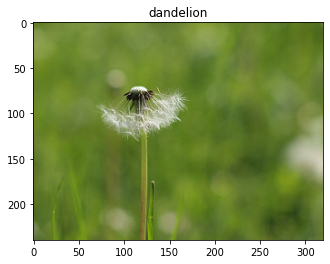

In [ ]:
random_index = np.random.randint(len(all_image_labels))
random_image = all_image_paths[random_index]
random_image = tf.io.read_file(random_image)
random_image = tf.image.decode_jpeg(random_image).numpy()
plt.imshow(random_image)

plt.title(inv_labels_index[all_image_labels[random_index]])

Looks like everything's good! So we'll be able to create a dataset that will mix images and labels. 

In [ ]:
# we create a dataset for our labels
labels_ds = tf.data.Dataset.from_tensor_slices(all_image_labels)

In [ ]:
# we create a dataset zipping the first and second
full_ds = tf.data.Dataset.zip((ds_images, labels_ds))

Let's take a look at the head of our new dataset:

In [ ]:
next(iter(full_ds))

(<tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
 array([[[1.52791672e+02, 1.34333328e+02, 1.26250000e+02],
         [1.53875000e+02, 1.35000000e+02, 1.21000000e+02],
         [1.59041656e+02, 1.38125000e+02, 1.20041664e+02],
         ...,
         [2.77082672e+01, 3.67916641e+01, 2.20831299e+00],
         [2.80000000e+01, 3.38750000e+01, 1.25000000e-01],
         [2.91249809e+01, 3.54582939e+01, 4.12495041e+00]],
 
        [[1.53791672e+02, 1.37541672e+02, 1.28625000e+02],
         [1.53000000e+02, 1.35750000e+02, 1.22125000e+02],
         [1.56625000e+02, 1.36166672e+02, 1.20708336e+02],
         ...,
         [2.52915878e+01, 3.53333130e+01, 1.33331299e+00],
         [2.76250000e+01, 3.26250000e+01, 6.25000000e-01],
         [2.67916641e+01, 3.31249771e+01, 2.04164124e+00]],
 
        [[1.53583328e+02, 1.39208328e+02, 1.30083328e+02],
         [1.52375000e+02, 1.35750000e+02, 1.24625000e+02],
         [1.54333328e+02, 1.35333328e+02, 1.21541664e+02],
         ...,
         [2

We can see that we have our dataset with the corresponding labels! So we're well on our way to launching our model. 

Let's now move on to the Data Augmentation part 

### Data Augmentation

This time, we won't do our data increase on Numpy objects but directly on the images in the *flower_photos* folder. 

Instead of going through Keras, this time we will use the same method we used above with the `map` function. So we will create an `augmentation` function that will do all the work of increasing and then map this to our data. 

In [ ]:
def augmentation(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_crop(image, size=(192, 192, 3))
    image = tf.image.random_brightness(image, max_delta=10)
    image = image / 255.

    return image, label

In the increase function, we perform : 

1. A horizontal mirror effect on the images 
2. Random trimming 
3. A random difference in brightness 

Let's apply them to our dataset 

In [ ]:
full_ds = full_ds.map(augmentation)

Let's do a last layer of preprocessing where we'll first mix all the images and then we'll transform our dataset into batches. 

This will allow our model to see different images per batch instead of seeing each label sequentially. 

In [ ]:
full_ds = full_ds.shuffle(len(all_images)).batch(10)

Now let's look at an image in 3 different batches. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


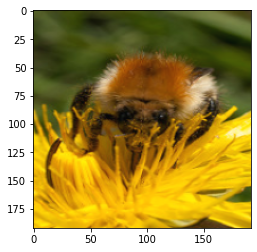

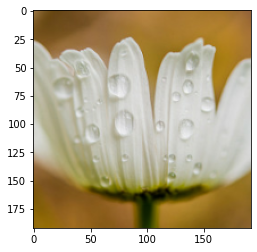

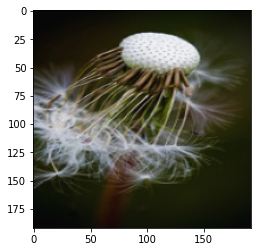

In [ ]:
for example_x, example_y in full_ds.take(3):
    plt.figure()
    plt.imshow(example_x[0].numpy())
  
plt.show()  

## Transfer Learning 

### Importing a pre-trained model 

Now that our images are pre-processed, we can move on to the algorithmic part. We will take care of using an already existing template: Inception_v3 and use it to classify our flowers. Here is how we can proceed

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(192, 192, 3), 
                                               include_top=False,
                                               weights="imagenet"
                                               )

87916544/87910968 [==============================] - 1s 0us/step


Here we have imported the architecture to which we have specified not to take the last output layer. Indeed, this layer will be adapted to our need for flower classification. This model has been trained on a much larger number of different images. 

Let's have a quick look at the architecture of our model:

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 95, 95, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 95, 95, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 95, 95, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

Now we have to freeze our model so that we can only train the last few layers

In [ ]:
base_model.trainable = False

This prevents us from training our entire model. Let us now add the last layer which interests us for our problem 

### Adapting the model to the dataset

When we imported our model, we removed the last layer to be able to adapt it to our situation. So now let's take the next cell of code to add our last layer. 

We will use a `GlobalAveragePooling2D` layer which will output the most significant pixels of the image, and a last `Dense` layer which will take the number of classes of our dataset and a `softmax` activation function which will output probabilities for each of the predictions. 

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation="softmax")
])

Let's prepare our cost function, our optimization and a learning rate schedule to improve our prediction results and minimize our cost function. 

In [ ]:
# Let's create a learning rate schedule to decrease the learning rate as we train the model. 
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

Now let's practice our model.

In [ ]:
model.fit(full_ds, epochs=5)

Epoch 1/5
367/367 [==============================] - 50s 24ms/step - loss: 0.8925 - sparse_categorical_accuracy: 0.6636
Epoch 2/5
367/367 [==============================] - 16s 25ms/step - loss: 0.4223 - sparse_categorical_accuracy: 0.8544
Epoch 3/5
367/367 [==============================] - 16s 25ms/step - loss: 0.3091 - sparse_categorical_accuracy: 0.8868
Epoch 4/5
367/367 [==============================] - 16s 25ms/step - loss: 0.3128 - sparse_categorical_accuracy: 0.8802
Epoch 5/5
367/367 [==============================] - 16s 25ms/step - loss: 0.2298 - sparse_categorical_accuracy: 0.9210


Our results are not bad already! We can however try to continue training our model but this time by releasing some layers. This is called _fine tuning_. So we're going to unlock the last 75 layers of the model. 

In [ ]:
base_model.trainable = True
fine_tune_at = 75
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Let's try to train the model again. 

In [1]:
# You will need to run a new model.compile before re-training the model. 
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

history = model.fit(full_ds, epochs=15)

NameError: ignored

We achieve very satisfactory results! We don't have a validation dataset so it will be difficult for us to verify the overfitting. However, let's look at a prediction on a training dataset.

In [ ]:
# we create a list of predictions for the entire dataset. 
y_pred = np.concatenate([np.argmax(model.predict_on_batch(data), 1) for data, label in full_ds])
y_pred

array([4, 2, 1, ..., 2, 2, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


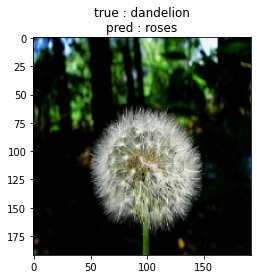

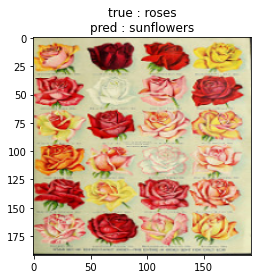

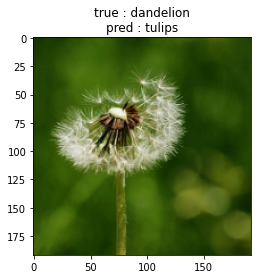

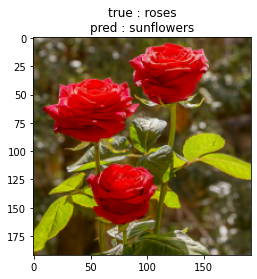

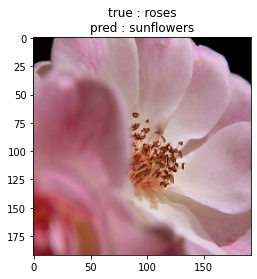

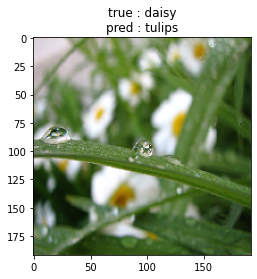

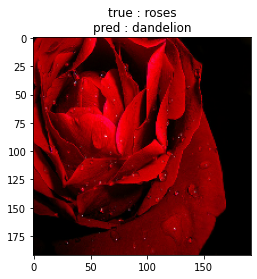

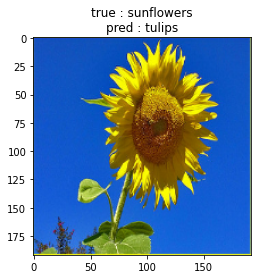

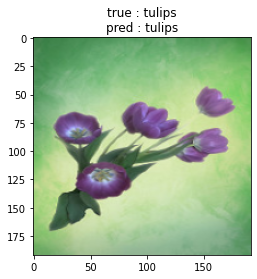

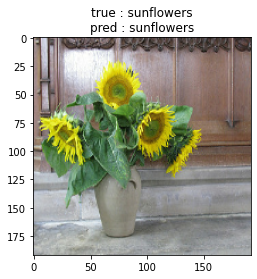

In [ ]:
# Let's see the 10 images of the batch 
for x, y in full_ds.take(1):
    for i in range(len(y)):
        plt.figure()
        plt.imshow(x.numpy()[i])
        plt.title("true : {}\npred : {}".format(inv_labels_index[y.numpy()[i]], inv_labels_index[y_pred[i]]))
plt.show()

Out of the 10 images in this batch, we have only 1 error. The results are therefore very satisfactory! 

## Visualize the learning process

To visualize the learning process, you will need to store the learning of your model in a variable 

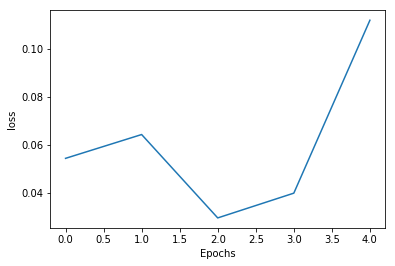

In [ ]:
plt.plot(history.history["loss"])
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

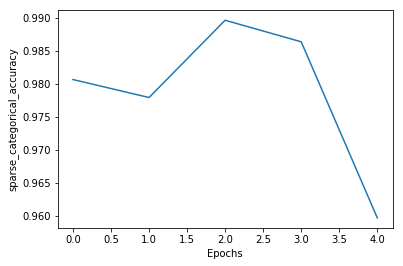

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"])
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

## Resources

* [Load Images with Tf.Data](https://www.tensorflow.org/beta/tutorials/load_data/images)
* [Transfer Learning using pre-trained ConvNets](https://www.tensorflow.org/beta/tutorials/images/transfer_learning)
* [History](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)